In [1]:
%reset-f


In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os, time
import warnings
import fileinput
from subprocess import call

from IPython.display import SVG,Image
from maps_lib import *
import pandas as pd

warnings.filterwarnings("always",category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###Data

In [31]:
df=pd.read_csv("countries_below_4000.txt")
ctoiso=pd.read_csv("names_to_iso.csv",usecols=["country","iso2"], index_col="country", squeeze=True)

df["iso2"]=df.country.map(ctoiso)
df[df.iso2.isnull()] #should be empty
df["color"]="#9ecae1"

###Export map data

In [32]:
df.to_csv('data_for_map.csv')

###Map

In [33]:
style_base =\
""".landxx.{iso2}
{{  
   fill: {color};
   stroke:#000000;
   stroke-width:0.3;
   fill-rule:evenodd;
}}"""

styles_rl=styles_r=styles=""
for c in df.index:
    styles = styles     + style_base.format(iso2=df["iso2"][c].lower(),color=df["color"][c])+ "\n"

append_styles_to_map("map_of_countries_below_4000",styles)


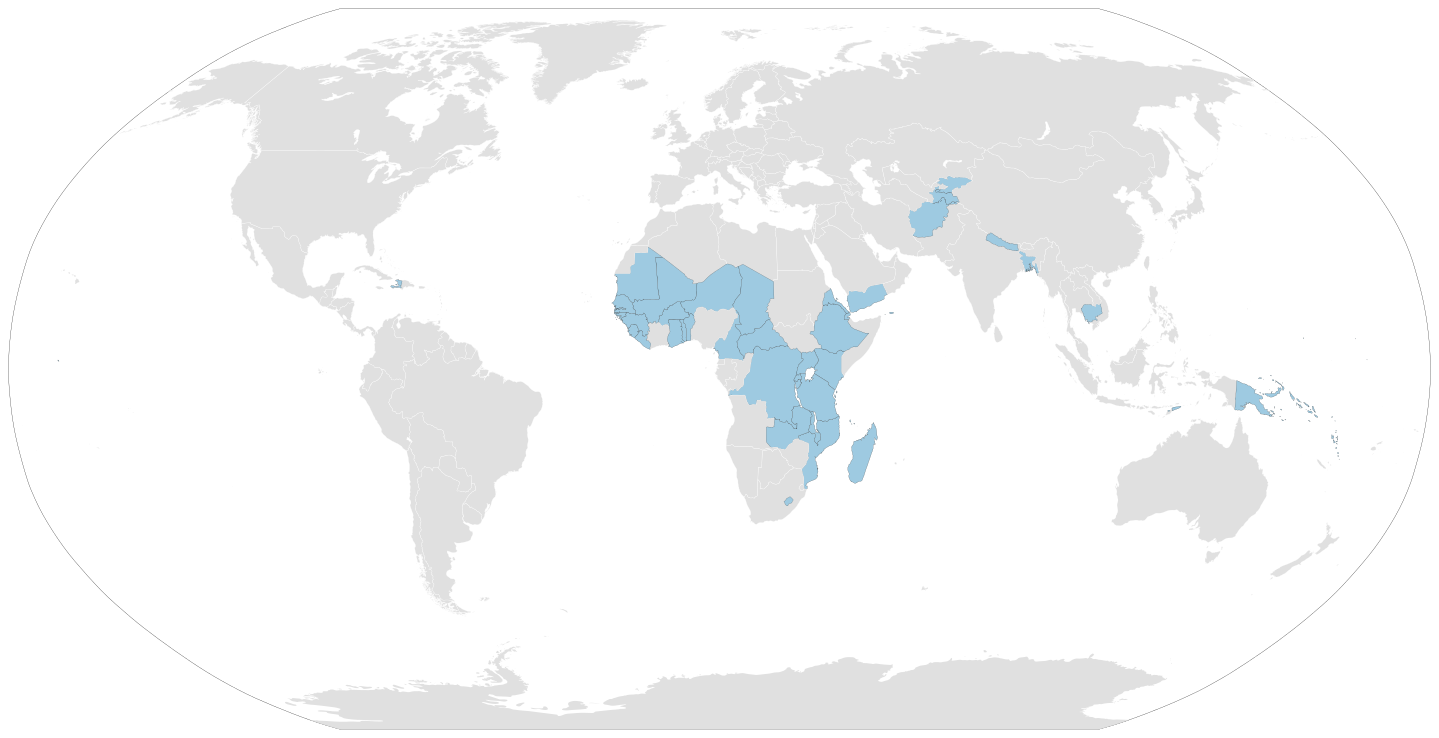

In [34]:
Image("map_of_countries_below_4000.png",width=700)